In [1]:
import tensorflow as tf
from tensorflow import keras

c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\tensorflow\python\f

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('E:\Research Paper\DATA\FILES\Final-Khariff.csv')
df.set_index("DISTRICT",inplace=True)
df.head()

,JUN-rainfall-pg21,JUL,AUG,SEP,OCT,NETAREASOWN-pg44,TotalCropped_area_pg30,HYV-pg45,HecterConsumptionpg46,Kharif-under-irrigation-51,Seed -Distribution-54,Amount-in-crores-pg58,TOTAL-pg60-jalanidhi,Total-khariff-79
DISTRICT,,,,,,,,,,,,,,
ANGUL,126.6,267.2,389.9,143.2,98.3,192,184.88,78.36,30.28,50.62,7962.90,197.24,615,463.92
BALASORE,165.1,303.5,335.0,308.0,153.1,198,197.48,213.15,108.78,99.48,13482.20,393.00,770,1554.11
BARAGARH,125.3,219.0,284.3,292.1,56.6,324,308.55,278.98,87.37,105.91,62526.08,60.00,337,1710.14
BHADRAK,178.7,324.3,309.2,257.0,88.6,163,172.88,143.16,126.27,106.33,8169.60,329.00,12,1216.72
BOLANGIR,81.3,244.7,272.1,330.3,78.3,312,346.96,193.83,46.91,57.43,51159.00,127.04,1115,1097.97


In [5]:
df.isnull().sum()

JUN-rainfall-pg21             0
JUL                           0
AUG                           0
SEP                           0
OCT                           0
NETAREASOWN-pg44              0
TotalCropped_area_pg30        0
HYV-pg45                      0
HecterConsumptionpg46         0
Kharif-under-irrigation-51    0
Seed -Distribution-54         0
Amount-in-crores-pg58         0
TOTAL-pg60-jalanidhi          0
Total-khariff-79              0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
#Inorder to apply on a column
# df[['pressure']] = imputer.fit_transform(df[['pressure']])

In [31]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [32]:
X.shape

(30, 4)

In [33]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
np.random.seed(42)
#tf.random_set_seed(42)

In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(5,activation="relu", input_shape=[4]),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(1)
])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [43]:
model_history = model.fit(X_train,y_train, epochs=20,validation_data=(X_valid,y_valid))

Train on 16 samples, validate on 6 samples
Epoch 1/20
16/16 [==============================] - 0s 5ms/sample - loss: 1175253.8750 - mean_absolute_error: 975.5635 - val_loss: 675285.8125 - val_mean_absolute_error: 696.4086
Epoch 2/20
16/16 [==============================] - 0s 249us/sample - loss: 1170529.0000 - mean_absolute_error: 973.1105 - val_loss: 666094.1250 - val_mean_absolute_error: 688.5257
Epoch 3/20
16/16 [==============================] - 0s 312us/sample - loss: 1161345.1250 - mean_absolute_error: 968.1990 - val_loss: 504112.1250 - val_mean_absolute_error: 516.4979
Epoch 4/20
16/16 [==============================] - 0s 374us/sample - loss: 965657.2500 - mean_absolute_error: 857.3219 - val_loss: 5046140416.0000 - val_mean_absolute_error: 66960.8047
Epoch 5/20
16/16 [==============================] - 0s 312us/sample - loss: 2523436032.0000 - mean_absolute_error: 48089.6797 - val_loss: 812708.5000 - val_mean_absolute_error: 789.4319
Epoch 6/20
16/16 [==========================

In [44]:
mae_test = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 125us/sample - loss: 685882.8750 - mean_absolute_error: 759.6522


In [45]:
model_history.history

{'loss': [1175253.875,
  1170529.0,
  1161345.125,
  965657.25,
  2523436032.0,
  1358608.75,
  1133892.125,
  9220852736.0,
  1565844.75,
  1560481.0,
  1555138.75,
  1549817.875,
  1544518.125,
  1539239.75,
  1533982.25,
  1528746.0,
  1523530.625,
  1518336.0,
  1513162.0,
  1508008.875],
 'mean_absolute_error': [975.5635,
  973.11053,
  968.19904,
  857.3219,
  48089.68,
  1065.2185,
  980.8258,
  50447.21,
  1158.5626,
  1156.2455,
  1153.933,
  1151.6251,
  1149.3219,
  1147.0232,
  1144.7292,
  1142.4397,
  1140.1548,
  1137.8745,
  1135.5989,
  1133.3276],
 'val_loss': [675285.8125,
  666094.125,
  504112.125,
  5046140416.0,
  812708.5,
  693849.25,
  6430742016.0,
  968997.1875,
  964911.9375,
  960845.5,
  956797.8125,
  952768.9375,
  948758.5625,
  944766.75,
  940793.5,
  936838.75,
  932902.1875,
  928983.75,
  925083.5625,
  921201.6875],
 'val_mean_absolute_error': [696.4086,
  688.5257,
  516.49786,
  66960.805,
  789.43195,
  667.91144,
  45571.94,
  882.71014,
  88

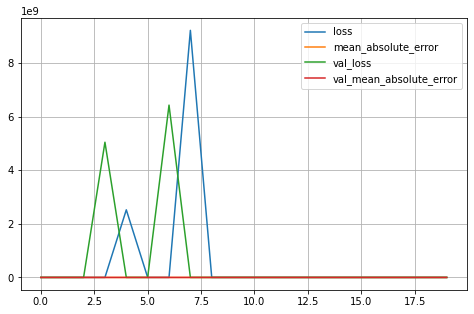

In [46]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

In [47]:
X_new = X_test[:3]

In [48]:
y_pred = model.predict(X_new)
print(y_pred)

[[-155.70845]
 [-155.70845]
 [-155.70845]]


In [49]:
print(y_test[:3])

DISTRICT
SAMBALPUR    771.97
KANDHAMAL    183.84
NAYAGARH     527.05
Name: Total-khariff-79, dtype: float64


In [50]:
model.save("my_model.h5")

In [51]:
model=keras.models.load_model("my_model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [52]:
del model

In [53]:
keras.backend.clear_session()

In [54]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(5,activation="relu")(input_)
hidden2 = keras.layers.Dense(5,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_],outputs=[output])


In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 5)            25          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 5)            30          dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 9)            0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [57]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [81]:
model_history = model.fit(X_train,y_train,epochs=80,validation_data=(X_valid,y_valid))

Train on 16 samples, validate on 6 samples
Epoch 1/80
16/16 [==============================] - 0s 312us/sample - loss: 170771.1406 - mean_absolute_error: 327.7356 - val_loss: 228167.9531 - val_mean_absolute_error: 382.5288
Epoch 2/80
16/16 [==============================] - 0s 249us/sample - loss: 170762.6875 - mean_absolute_error: 327.7259 - val_loss: 228168.7500 - val_mean_absolute_error: 382.5247
Epoch 3/80
16/16 [==============================] - 0s 249us/sample - loss: 170754.2188 - mean_absolute_error: 327.7162 - val_loss: 228169.5469 - val_mean_absolute_error: 382.5207
Epoch 4/80
16/16 [==============================] - 0s 312us/sample - loss: 170745.8125 - mean_absolute_error: 327.7064 - val_loss: 228170.2656 - val_mean_absolute_error: 382.5166
Epoch 5/80
16/16 [==============================] - 0s 374us/sample - loss: 170737.4062 - mean_absolute_error: 327.6967 - val_loss: 228170.9844 - val_mean_absolute_error: 382.5124
Epoch 6/80
16/16 [==============================] - 0s 24

In [82]:
mae_test = model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 246us/sample - loss: 531964.1250 - mean_absolute_error: 619.6116


In [83]:
model.history.history

{'loss': [170771.140625,
  170762.6875,
  170754.21875,
  170745.8125,
  170737.40625,
  170729.03125,
  170720.671875,
  170712.34375,
  170704.046875,
  170695.75,
  170687.5,
  170679.25,
  170671.046875,
  170662.84375,
  170654.671875,
  170646.53125,
  170638.40625,
  170630.3125,
  170622.203125,
  170614.171875,
  170606.125,
  170598.125,
  170590.140625,
  170582.15625,
  170574.203125,
  170566.28125,
  170558.375,
  170550.484375,
  170542.640625,
  170534.796875,
  170526.984375,
  170519.1875,
  170511.375,
  170503.640625,
  170495.90625,
  170488.21875,
  170480.5,
  170472.84375,
  170465.203125,
  170457.5625,
  170449.953125,
  170442.375,
  170434.8125,
  170427.25,
  170419.75,
  170412.234375,
  170404.75,
  170397.265625,
  170389.84375,
  170382.40625,
  170375.03125,
  170367.625,
  170360.265625,
  170352.921875,
  170345.59375,
  170338.28125,
  170331.015625,
  170323.734375,
  170316.5,
  170309.25,
  170302.046875,
  170294.859375,
  170287.703125,
  17028

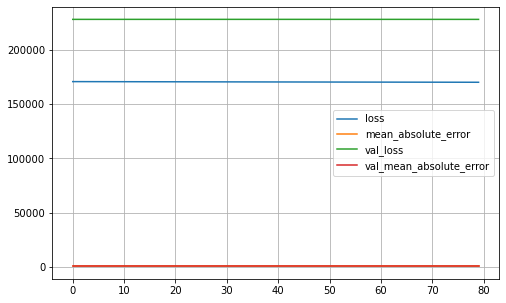

In [84]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

In [85]:
model.save("my_model")

In [86]:
del model

In [87]:
keras.backend.clear_session()

In [88]:
model = keras.models.load_model("my_model")

In [90]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 5)            25          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 5)            30          dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 9)            0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [92]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

[[ 409.23993]
 [1218.2083 ]
 [1177.8684 ]]


In [93]:
print(y_test[:3])

DISTRICT
SAMBALPUR    771.97
KANDHAMAL    183.84
NAYAGARH     527.05
Name: Total-khariff-79, dtype: float64


In [94]:
X_test[0]

array([-1.13102401, -0.56797117,  2.21595271, -1.18943758])

In [95]:
y_test[0]

771.97

In [97]:
!pip install seaborn
import seaborn as sns
from pandas import DataFrame

c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total-khariff-79', ylabel='Density'>

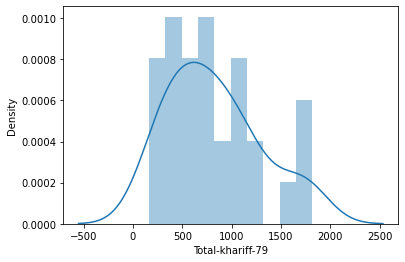

In [98]:
sns.distplot(df['Total-khariff-79'],bins=10,kde=True)

c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total-khariff-79'>

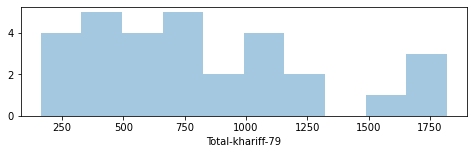

In [99]:
fig,ax=plt.subplots(figsize=(8,2))
sns.distplot(df['Total-khariff-79'],bins=10,kde=False,ax=ax)

c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


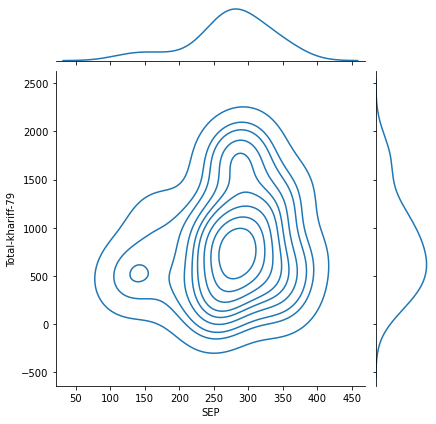

In [100]:
sns.jointplot('SEP','Total-khariff-79',data=df,kind='kde')

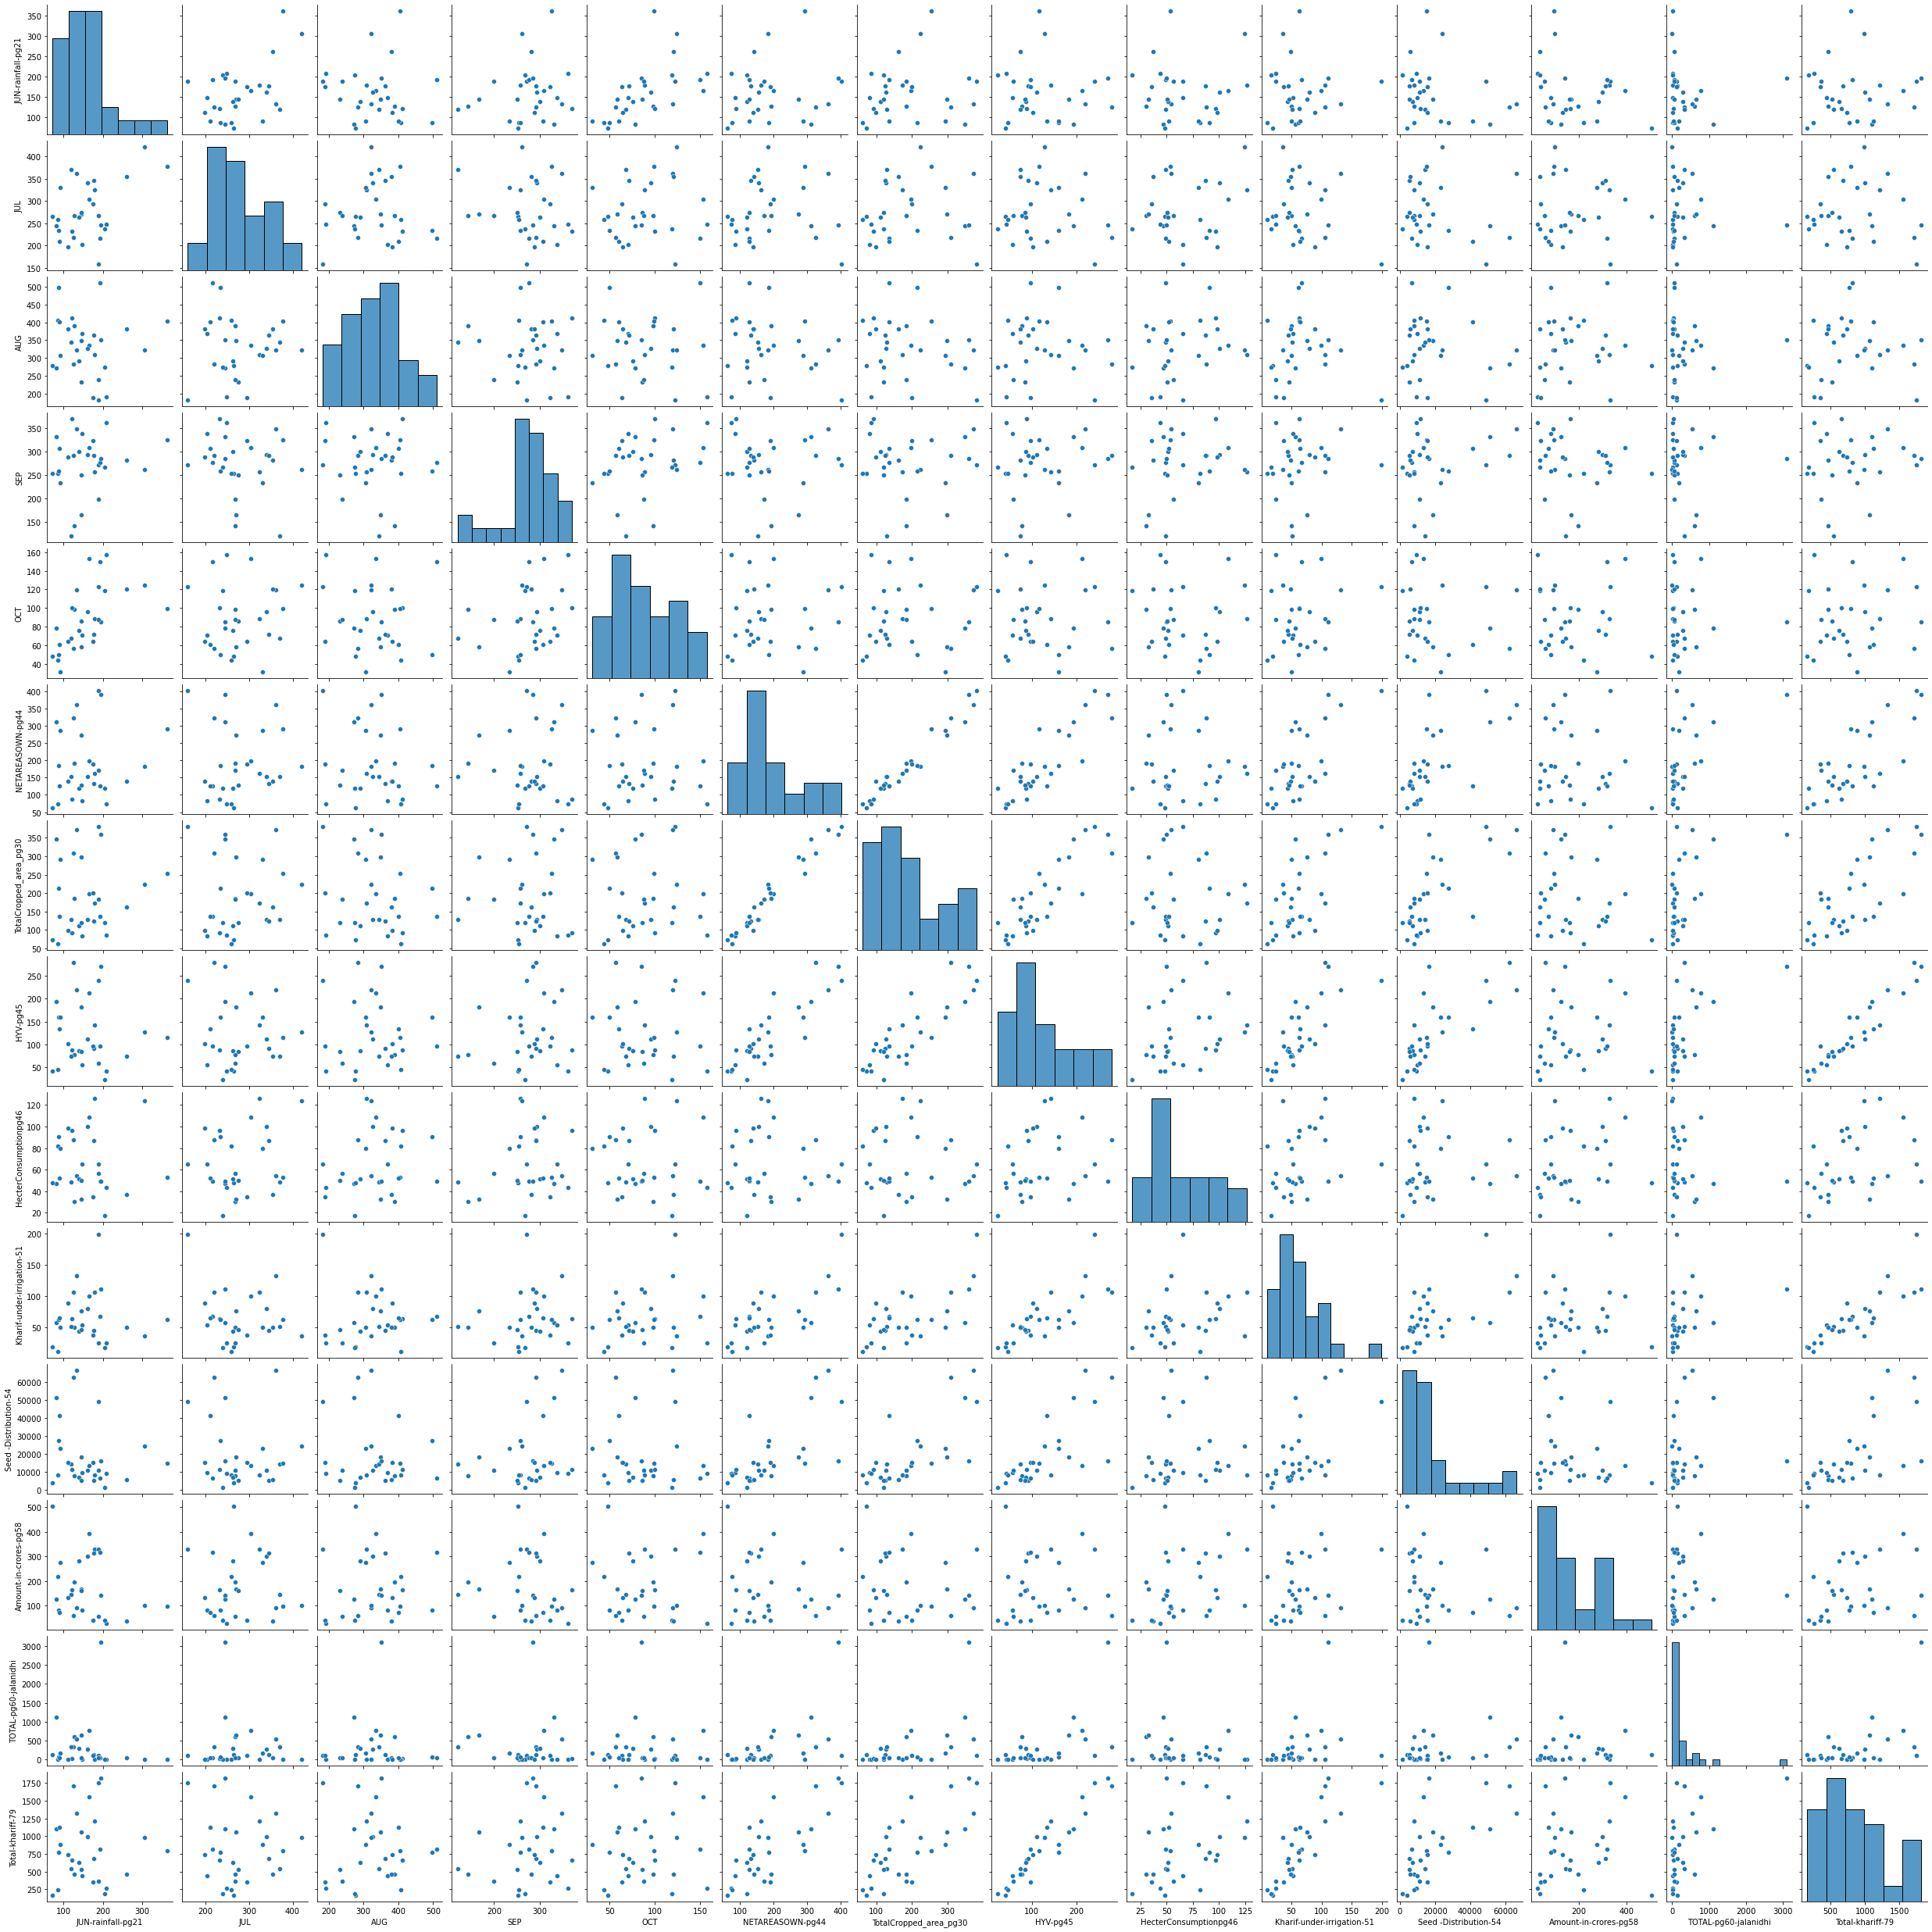

In [101]:
sns.pairplot(df)

<AxesSubplot:xlabel='Total-khariff-79', ylabel='count'>

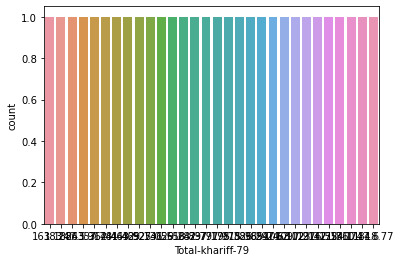

In [102]:
sns.countplot(x="Total-khariff-79",data=df)

In [103]:
y_test

DISTRICT
SAMBALPUR      771.97
KANDHAMAL      183.84
NAYAGARH       527.05
KEONJHAR      1062.02
DHENKANAL      541.51
GAJAPATI       263.91
SUBARNAPUR    1123.47
NUAPADA        357.78
Name: Total-khariff-79, dtype: float64